# Test Case 2 : MNIST Dataset

- One of the most famous task for multi-class classification

- Metadata
> feature grayscale image size : (8 x 8) --=-- range : Integer [0,16]  <br>
> target : scalar --=-- range : Integer [0,9] <br>
> number of observations : 1797

<br> 
- Ex:

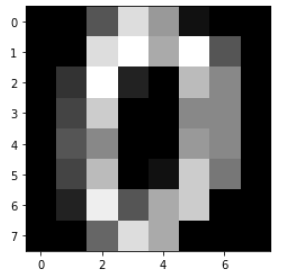

I.E. Our goal is to map a set of 64 features into 1 out of 10 labels

In [1]:
import import_ipynb

In [2]:
from mlp import *

# %% External module
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mnist : dict = load_digits() 

# Assume we have only .image and .target

importing Jupyter notebook from mlp.ipynb
importing Jupyter notebook from mlp_component.ipynb
importing Jupyter notebook from activation.ipynb
importing Jupyter notebook from regularization.ipynb
importing Jupyter notebook from compute_cost.ipynb
importing Jupyter notebook from losses.ipynb
importing Jupyter notebook from update_params.ipynb
importing Jupyter notebook from optimizer.ipynb
importing Jupyter notebook from debug_util.ipynb
importing Jupyter notebook from C:\Users\Wallik\Desktop\dipple\nbdip\utils\py_util.ipynb
importing Jupyter notebook from initializer.ipynb
importing Jupyter notebook from load.ipynb
importing Jupyter notebook from metrics.ipynb


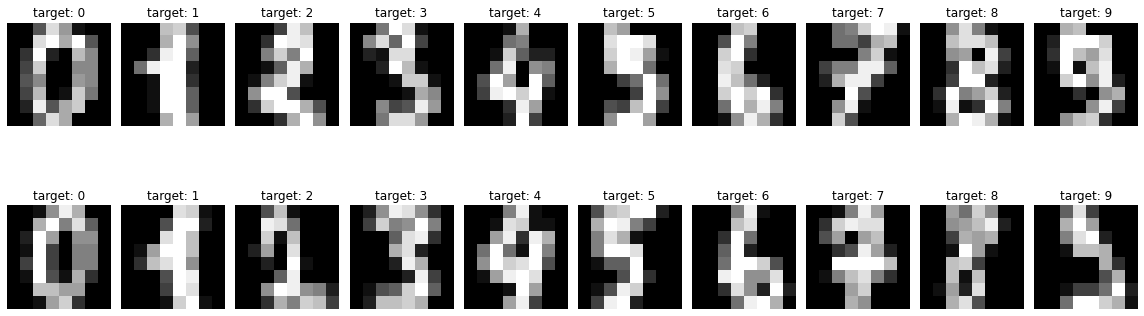

In [3]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

# ref : https://h1ros.github.io/posts/loading-scikit-learns-mnist-dataset/

In [4]:
# Our first observation is like the following
data_0 = (mnist.images[0] , mnist.target[0])
print(data_0)
# However, we have to unroll (flatten) this matrix into vector

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)


In [5]:
# Flatten

nx = (mnist.images[0].shape[0]) * (mnist.images[0].shape[1]) # nx : number of features
c  = len(np.unique(mnist.target))                            # number of classes
m  = mnist.images.shape[0]                                    # m : number of observation

X = mnist.images.reshape(-1,nx)  # X.shape : (1797, 64)

Y = np.zeros((mnist.target.size, mnist.target.max() + 1))
Y[np.arange(mnist.target.size), mnist.target]   = 1 # Y.shape : (1797, 10)  (using one hot encoding)


In [6]:
X = pd.DataFrame(X).add_prefix('feature').astype(int)
Y = pd.DataFrame(Y).astype(int)

df = pd.concat([X,Y],axis=1)

In [7]:
df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,0,1,2,3,4,5,6,7,8,9
0,0,0,5,13,9,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,4,15,12,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1793,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
hyperparam_setting = {
              "layer_dims" : [64,256,256,10],
              "hidden_activation_function" : 'relu',
              "output_activation_function" : 'softmax',}   

In [9]:
X = df.iloc[:,0:64]
Y = df.iloc[:,-10:]

Epoch 500/5000 : ===Cost=== : 12.877955787793379
Epoch 1000/5000 : ===Cost=== : 7.236284769273569
Epoch 1500/5000 : ===Cost=== : 0.6814122425168234
Epoch 2000/5000 : ===Cost=== : 0.007974205406745616
Epoch 2500/5000 : ===Cost=== : 0.00034630293872944893
Epoch 3000/5000 : ===Cost=== : 2.285503964576058e-05
Epoch 3500/5000 : ===Cost=== : 1.6160488762116618e-06
Epoch 4000/5000 : ===Cost=== : 1.3766223252629672e-07
Epoch 4500/5000 : ===Cost=== : 1.882675948813411e-08
Epoch 5000/5000 : ===Cost=== : 4.24787378447844e-09


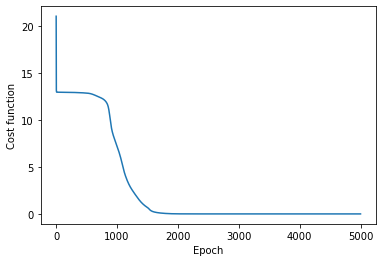

In [10]:
lambd = 0   # No regularization
lr = 1e-3

model = MultilayerPerceptron.initiate_by_hyperparam_dict(hyperparam_setting)
model.compiles(initialization='he',lr=lr,loss='cross_entropy_loss',regularization="L2",lambd= lambd,optimizer='adam',beta1=0.9,beta2=0.99,eps=10e-8)
model.fit(X,Y,Epochs=5000,batch_size=m,grad_check=False,report_cost=True, evry_report_epoch = 500)

In [11]:
x0 = X.iloc[0:18]
y0 = Y.iloc[0:18]
x0

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0
5,0,0,12,10,0,0,0,0,0,0,...,4,0,0,0,9,16,16,10,0,0
6,0,0,0,12,13,0,0,0,0,0,...,8,0,0,0,1,9,15,11,3,0
7,0,0,7,8,13,16,15,1,0,0,...,0,0,0,0,13,5,0,0,0,0
8,0,0,9,14,8,1,0,0,0,0,...,8,0,0,0,11,16,15,11,1,0
9,0,0,11,12,0,0,0,0,0,2,...,4,0,0,0,9,12,13,3,0,0


In [12]:
y_pred = model.predict(X)
y_pred.shape

(1797,)

In [13]:
from metrics import accuracy_score
acc = accuracy_score(mnist.target,y_pred)
print(f'the accuracy on training set is : {acc}')

the accuracy on training set is : 1.0
